Capstone Project Modul 3
Hotel Booking Cancellation

# Business Problem Understanding

##Pendahuluan : 
  Industri pariwisata merupakan salah satu tempat perputaran uang yang besar. Tidak jarang suatu wilayah GDP terbesarnya disumbangkan oleh sektor pariwisata. Salah satu bidangnya adalah perhotelan. Menjalankan bisnis perhotelan bukanlah hal yang mudah. Proses booking hotel sekarang sangat mudah dan beragam, seiring dengan hal tersebut kemungkinan calon tamu membatalkan bookingannya semakin meningkat. Entah karena melihat price yang lebih terjangkau, atau kebutuhan lain. 

  Selain itu, tamu memiliki preferensi tergantung dengan kebutuhan bermalam mereka pada saat itu. Salah satu masalah yang datang adalah ketika sang tamu membatalkan booking atau tidak muncul ketika waktu yang tidak ditentukan. Hal ini akan mengganggu revenue perusahaan. Saking seriusnya hal ini, VISA sampai mengeluarkan layanan untuk men-charge otomatis tabungan yang bersangkutan. Maka dari itu, hal ini menarik untuk diteliti.


------------------------------------------------------------
##Landasan Teori
Booking Cancellation dan No-shows akan berimplikasi pada revenue perusahaan karena 'loss of booking opportunities'. Pertama, Booking cancellation akan menyebabkan 'unsold rooms'. meskipun dapat dibooking kembali, waktu yang telah hilang bagi calon konsumen lainnya juga telah hilang. Kedua, memberikan kerja ekstra bagi karyawan. Sistem kerja di perhotelan pada umumnya selalu menyiapkan kembali kamar sebelum ditempati. Mungkin bukan masalah yang terlalu serius bagi hotel yang selalu penuh. Namun bagi hotel yang bergantung pada situasi waktu tertentu, atau tipe pengunjung tertentu sebagai contoh, hotel didaerah pariwisata. Tentu hal ini akan mengganggu secara langsung profit margin.

Terdapat argumen dari Data Scientis senior, Michael Grogan mengenai permasalahan ini (Sumber : https://www.iunera.com/kraken/interviews/what-you-need-to-know-about-hotel-booking-cancellations-big-data/ ). Ia menyebutkan bahwa pada studi kasus di portugal, setidaknya hampir 1/3 booking hotel mengalami cancellation. Tentunya ada evidence yang kuat terhadap revenue loss yang dialami yang sifatnya substansial. Berapa besar kerugiannya tergantung dari hotal yang bersangkutan. Tentu sebagai pelaku bisnis ingin meningkatkan revenue sebesar besarnya demi berjalannya perusahaan. Salah satu caranya adalah dengan menerapkan teknologi. Meskipun begitu, ada beberapa permasalahan lain yang dihadapi.

Perusahaan atau pihak pengelola sering kali menerapkan kebijakan pembatalan yang sangat kaku. Belum lagi ditambah dengan ketentuan biaya pembatalan pesanan yang harus dibayar oleh pelanggan yang tidak humanis. Hal tersebut dapat merusak reputasi dan kinerja bisnis hotel di masa mendatang. Kitamori dkk. [1] mengatakan bahwapara pemilik industri rata-rata ingin mengetahui keuntungan bisnisnya berdasarkan peramalan dari data yang telah mereka miliki. Namun, saat mencoba menerapkan metode tersebut seringkali ditemukan masalah pada variabel data yang rata-rata terlalu umum dan tidak spesifik (Azhar, et. all. 2021). 



------------------------------------------------------------


##Rumusan Masalah :

a. Booking Cancellation oleh konsumen akan mengakibatkan Opportunity Cost. Perlu deteksi awal apakah calon tamu berpeluang cancel

b. Kamar yang sebenernya dapat dipesan oleh konsumen lain namun ternyata tidak terjadi pembayaran menyebabkan perusahaan kehilangan revenue (revenue loss)

c. Faktor yang paling signifikan menyebabkan cancellation penting untuk diketahui.


------------------------------------------------------------

##Tujuan :

a. Dapat memprediksi calon konsumen yang memiliki kemungkinan cancel sehingga strategi yang dilakukan(seperti promo, dll.) akan tepat sasaran

b. Meminimalisir kemungkinan revenue loss yang dialami perusahaan

c. Mengetahui faktor apa yang paling signifikan menyebabkan 'booking cancellation' untuk mempertimbangkan langkah terbaik


------------------------------------------------------------
##Target :
0 : Jadi bermalam,

1 : Membatalkan Booking


## Metric Evaluation :
Hal yang ingin dilakukan adalah meminimalisir revenue loss perusahaan. Dalam hal ini kita tertarik untuk meninjau sekomprehensif mungkin kejadian cancel (*Completeness*). Oleh karena itu, yang dilakukan adalah meminimalisir false negatif rate. Metric yang dijadikan fokus adalah 'Recall'

# Data Preparation

In [ ]:
# Library
#Fund. Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#Modelling and Evaluation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
#Set working directory
import os
os.getcwd()
os.chdir('/Users/yudhapratama/Documents/Data Capstone 2')

In [ ]:
#Membuka data
df = pd.read_csv('/Users/yudhapratama/Documents/data/data_hotel_booking_demand.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


Data berisikan 83573 Data dengan 10 Kolom. 9 Feature dan 1 Target


1.   is_canceled : mengindikasikan cancel/tidak 
2.   county      : Negara Asal pengunjung
3.   market_segment : Segmentasi market, Tour Operators/Travel dll.
4. booking_changes : catatan historis perubahan booking
5. days_in_waiting_list : banyaknya hari ketika booking masuk hingga terkonfirmasi
6. customer_type : Tipe booking
7. reserved_room_type : Tipe kamar
9. required_car_parking_space : Banyaknya tempat parkir yang diinginkan
10. Total_of_special_request : Banyaknya request(twin bed dll.)


## Rename Columns

Merename nama kolom agar tidak terlalu panjang dalam proses koding

In [ ]:
df.rename(columns={'market_segment':'market','previous_cancellations':'prevCanc','booking_changes':'bookCh','deposit_type':'deposit','days_in_waiting_list':'waitingList','customer_type':'customer','reserved_room_type':'room','required_car_parking_spaces':'parkingSpace', 'total_of_special_request':'request','is_canceled':'cancel','total_of_special_requests':'request'}, inplace=True)

In [ ]:
df.columns

Index(['country', 'market', 'prevCanc', 'bookCh', 'deposit', 'waitingList',
       'customer', 'room', 'parkingSpace', 'request', 'cancel'],
      dtype='object')

## Missing value

### Filling mising value

Karena tidak ingin kehilangan data yang akan digunakan kedepannya, baris yang memiliki missing value tidak dihapus tapi diisi sengan konstan.

In [ ]:
#fill missing value
##Menggunakan constant
df['country'].fillna('Other',inplace = True)

In [ ]:
df['country']

0        IRL
1        FRA
2        PRT
3        NLD
4        PRT
        ... 
83568    PRT
83569    FRA
83570    PRT
83571     CN
83572    PRT
Name: country, Length: 83573, dtype: object

In [ ]:
df[df['country']=='Other']

,country,market,prevCanc,bookCh,deposit,waitingList,customer,room,parkingSpace,request,cancel
814,Other,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1166,Other,Direct,2,0,No Deposit,0,Transient,E,0,3,1
1304,Other,Direct,0,1,No Deposit,0,Transient,D,0,1,0
1661,Other,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
2182,Other,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82466,Other,Offline TA/TO,0,0,No Deposit,0,Transient,A,0,0,0
83084,Other,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
83106,Other,Direct,0,0,No Deposit,0,Transient,A,0,2,0
83353,Other,Direct,0,0,No Deposit,0,Transient,A,0,0,0


## Ubah Undefined

Setelah percobaan modelling sebelumnya, undefined disini bukanlah string. sehingga mengganggu pada proses modeling.
Hal yang dilakukan adalah mengubahnya dengan modus.

In [ ]:
df['market'] = df['market'].replace(['Undefined'], 'Online TA')

In [ ]:
df['market'].value_counts()

Online TA        39461
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Name: market, dtype: int64

In [ ]:
df['deposit'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [ ]:
df['customer'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

In [ ]:
df['room'].unique()

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

## Scaling

In [ ]:
fitur_kategorik = df[['country', 'market','deposit', 'customer','room']].columns
fitur_kategorik

Index(['country', 'market', 'deposit', 'customer', 'room'], dtype='object')

In [ ]:
fitur_numerik = df[['prevCanc', 'bookCh', 'waitingList', 'parkingSpace', 'request']].columns
fitur_numerik

Index(['prevCanc', 'bookCh', 'waitingList', 'parkingSpace', 'request'], dtype='object')

/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

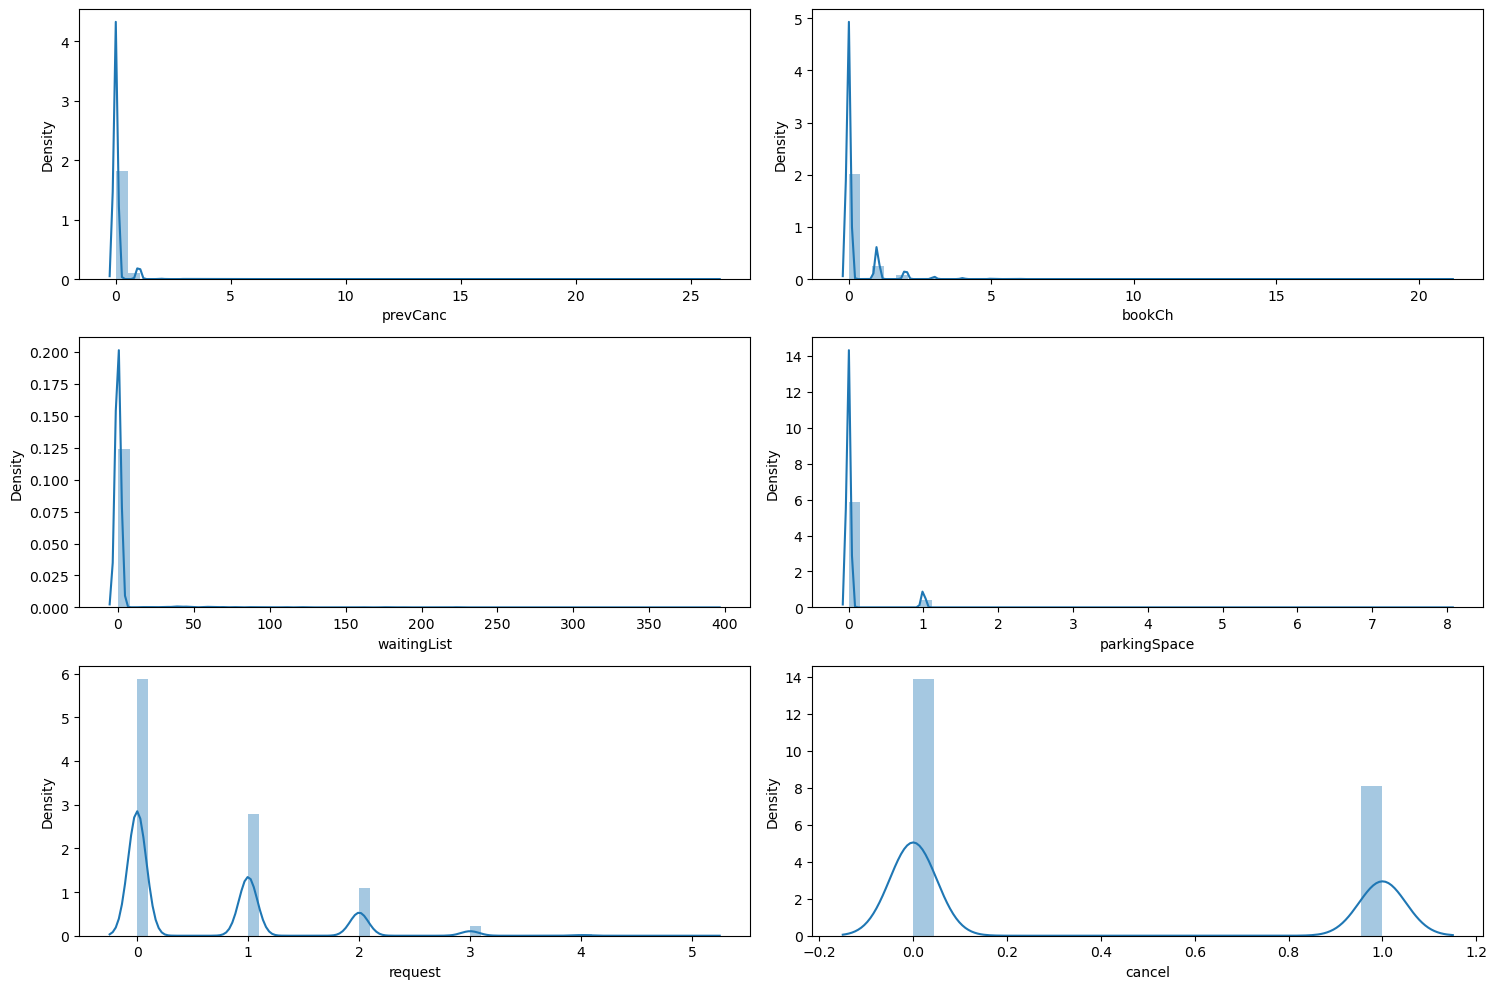

In [ ]:
#Mari kita lihat distribusi datanya pada kolom numerik
plt.figure(figsize = (15,10)) #Mengatur ukuran figurenya
plt.subplot(3,2,1)
sns.distplot(df['prevCanc'])
plt.subplot(3,2,2)
sns.distplot(df['bookCh'])
plt.subplot(3,2,3)
sns.distplot(df['waitingList'])
plt.subplot(3,2,4)
sns.distplot(df['parkingSpace'])
plt.subplot(3,2,5)
sns.distplot(df['request'])
plt.subplot(3,2,6)
sns.distplot(df['cancel'])
plt.tight_layout()

Data yang dimiliki tidak terdistribusi normal. Selain itu, melihat karakteristik datanya diperlukan scaling untuk lebih mengoptimalkan kinerja machine learning.



In [ ]:
df['cancel'].value_counts()

0    52795
1    30778
Name: cancel, dtype: int64

In [ ]:
df['cancel'].value_counts()/len(df['cancel']) * 100

0    63.172316
1    36.827684
Name: cancel, dtype: float64

Dilihat dari grafik dan hasil diatas bahwa banyaknya data 0 dan 1 tidak sama/imbalance. Hal ini merupakan dasar untuk melakukan undersampling/oversampling.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

In [ ]:
Xsc = df[['bookCh', 'waitingList']]

In [ ]:
#using scaler for getting a smaller range
Xsc_robust = robust.fit_transform(Xsc)
Xsc_robust = pd.DataFrame(Xsc_robust, columns=['bookCh', 'uwaitingListo'])
Xsc_robust.describe()

,bookCh,uwaitingListo
count,83573.000000,83573.000000
mean,0.220897,2.330561
std,0.648635,17.673051
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,21.000000,391.000000


In [ ]:
#Kali ini menggunakan Robust scaler

## Encoding

### OneHotEncoder & Binary for categorical variables
#### Untuk feature yang bersifat kategorikal, akan diubah melalui encoding. Untuk kolom yang unique valuenya banyak, akan diubah melalui binary encoder. Selain itu, menggunakan One Hot. Transformasi dengan bantuan ColumnTransformer

In [ ]:
##Kodingan melalui Column Trasnformer ada pada segmen 'Perumusan Transformasi'

A    60041
D    13526
E     4649
F     2037
G     1447
B      787
C      673
H      401
P        9
L        3
Name: room, dtype: int64

## Binning

Setelah melihat distribusi data, saya mencoba menggunakan binning untuk membantu optimalisasi machine learning dengan mengelompokan data

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
df[['waitingList']].describe()

,waitingList
count,83573.000000
mean,2.330561
std,17.673051
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,391.000000


In [ ]:
discretize = KBinsDiscretizer(n_bins = 7, encode = 'onehot', strategy = 'uniform')

## Perumusan Transformasi

In [ ]:
#Data preparation yang telah direncanakan diatas dieksekusi dengan menggunakan ColumnTransformer.
##Kedepannya, akan dilakukan juga penerapan Pipeline untuk mencegah information leakage. Namun untuk proses awal manual dulu.
binary_encoder_pline = Pipeline([('imputer',SimpleImputer(strategy = 'constant',fill_value = 'Other')),
                                 ('binary encoder',ce.BinaryEncoder())
]) #Simple imputer disini digunakan untuk mengisi missing value pada kolom country dengan cara pengisian value 'konstan'

binary_encoder = ce.BinaryEncoder()

robust_scaler= RobustScaler() 

transformer_pure = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'),['customer','deposit','market']),
    ('binary encoder', binary_encoder_pline, ['country']),   
    ], 
    remainder='passthrough')

transformer_full = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'),['customer','deposit','market']),
    ('binary encoder', binary_encoder_pline, ['country']),
    ('binary simple', ce.BinaryEncoder(),['room']),
    ('robust scaler', RobustScaler(), ['waitingList'])
    ], 
    remainder='passthrough')

transformer = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'),['customer','deposit','market']),
    ('binary encoder', binary_encoder_pline, ['country']),
    ('binary simple', ce.BinaryEncoder(),['room'])
    ], 
    remainder='passthrough')

## Data Splitting

In [ ]:
#Membagi dulu datanya
X = df.drop(columns=['cancel'])
y = df['cancel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 1945)

Kali ini saya membagi data train dan test set dengan proporsi 80:20. Karena ini adalah kasus klasifikasi saya menggunakan stratify = y.

# Transformasi Data

Kali ini saya akan menggunakan transformasi manual terlebih dahulu

In [ ]:
X_train.head()

,country,market,prevCanc,bookCh,deposit,waitingList,customer,room,parkingSpace,request
48117,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,0
80710,TUR,Online TA,0,0,No Deposit,0,Transient,A,0,0
4529,FRA,Online TA,0,0,No Deposit,0,Transient-Party,E,0,2
54100,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0
75547,PRT,Corporate,0,0,No Deposit,0,Transient-Party,A,0,0


In [ ]:
X_trainpreprep_m = transformer_full.fit_transform(X_train)
X_testpreprep_m = transformer_full.transform(X_test)

In [ ]:
X_trainpreprep_m

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 2.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 3.]])

In [ ]:
X_train_preprep_m = pd.DataFrame(X_trainpreprep_m)
X_test_preprep_m = pd.DataFrame(X_testpreprep_m)
X_train_preprep_m

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66853,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
66855,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
66856,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### Mengambil nama nama kolom

In [ ]:
transformer_full.transformers_[0][1].get_feature_names()

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


array(['x0_Group', 'x0_Transient', 'x0_Transient-Party', 'x1_Non Refund',
       'x1_Refundable', 'x2_Complementary', 'x2_Corporate', 'x2_Direct',
       'x2_Groups', 'x2_Offline TA/TO', 'x2_Online TA'], dtype=object)

In [ ]:
transformer_full.transformers_[1][1][1].get_feature_names()

['0_0', '0_1', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7']

In [ ]:
transformer_full.transformers_[2][1].get_feature_names()

['room_0', 'room_1', 'room_2', 'room_3']

In [ ]:
features = list(transformer_aja.transformers_[0][1].get_feature_names()) + transformer_aja.transformers_[1][1][1].get_feature_names() + transformer_aja.transformers_[2][1].get_feature_names() + ['prevCanc','bookCh','waitingList','parkingSpace','request']
X_train_preprep_m.columns = features
X_test_preprep_m.columns = features
X_test_preprep_m

/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Group,x0_Transient,x0_Transient-Party,x1_Non Refund,x1_Refundable,x2_Complementary,x2_Corporate,x2_Direct,x2_Groups,x2_Offline TA/TO,...,0_7,room_0,room_1,room_2,room_3,prevCanc,bookCh,waitingList,parkingSpace,request
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
16711,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16712,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
16713,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0


# Feature Selection

Ada 3 tipe feature selection, univariate feat selection, model based feature selection, iterative feature selection.
Kekurangan dari univaraiate feature selection adalah '* it cant capture interaction*'. Sehingga, beberapa fitur yang malah dihilangkan bisa jadi berperan pada model yang ingn digunakan. Ketika pakai model based, karena ada interaksi dengan model sehingga akan lebih optimal. Namun, akan memakan waktu lebih lama. Iterative lebih lama lagi. Karena melihat perubahan nilai feature importance. Untuk kali ini saya akan melakukan feature selection dengan menggunakan model based melalui model rf.

## Model Based Feature Importance

In [ ]:
#Modelling sederhana dulu

In [ ]:
rf = RandomForestClassifier(random_state= 1945)

In [ ]:
rf.fit(X_train_preprep_m,y_train)

RandomForestClassifier(random_state=1945)

In [ ]:
print('RANDOM FOREST TEST SET')
y_pred=rf.predict(X_test_preprep_m)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

RANDOM FOREST TEST SET
[[9312 1247]
 [1941 4215]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     10559
           1       0.77      0.68      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.78      0.79     16715
weighted avg       0.81      0.81      0.81     16715



0.8092731079868382

[0.0014384  0.03364394 0.02111431 0.27621388 0.00050231 0.00201001
 0.01524834 0.01882619 0.03179599 0.02472316 0.05797231 0.00061694
 0.00554233 0.01243396 0.02039416 0.04247858 0.02249488 0.06272978
 0.01586233 0.0030292  0.00912019 0.01480057 0.01125345 0.01303892
 0.07022151 0.05062238 0.05142119 0.11045075]


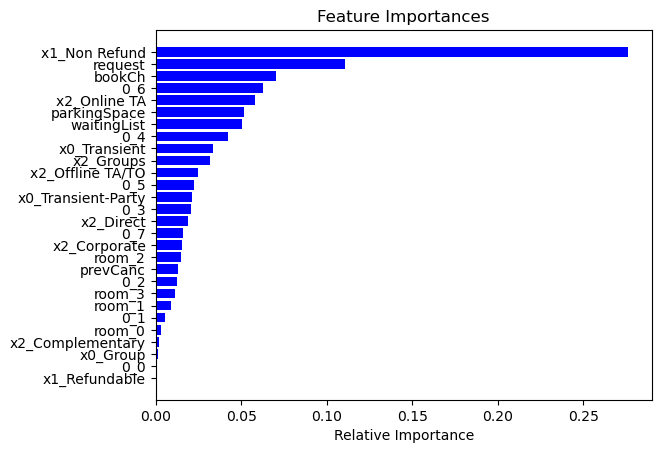

In [ ]:
rf.fit(X_train_preprep_m,y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = pd.DataFrame(X_train_preprep_m).columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## SHAP value

In [ ]:
import shap

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       83573 non-null  object
 1   market        83573 non-null  object
 2   prevCanc      83573 non-null  int64 
 3   bookCh        83573 non-null  int64 
 4   deposit       83573 non-null  object
 5   waitingList   83573 non-null  int64 
 6   customer      83573 non-null  object
 7   room          83573 non-null  object
 8   parkingSpace  83573 non-null  int64 
 9   request       83573 non-null  int64 
 10  cancel        83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_preprep_m)

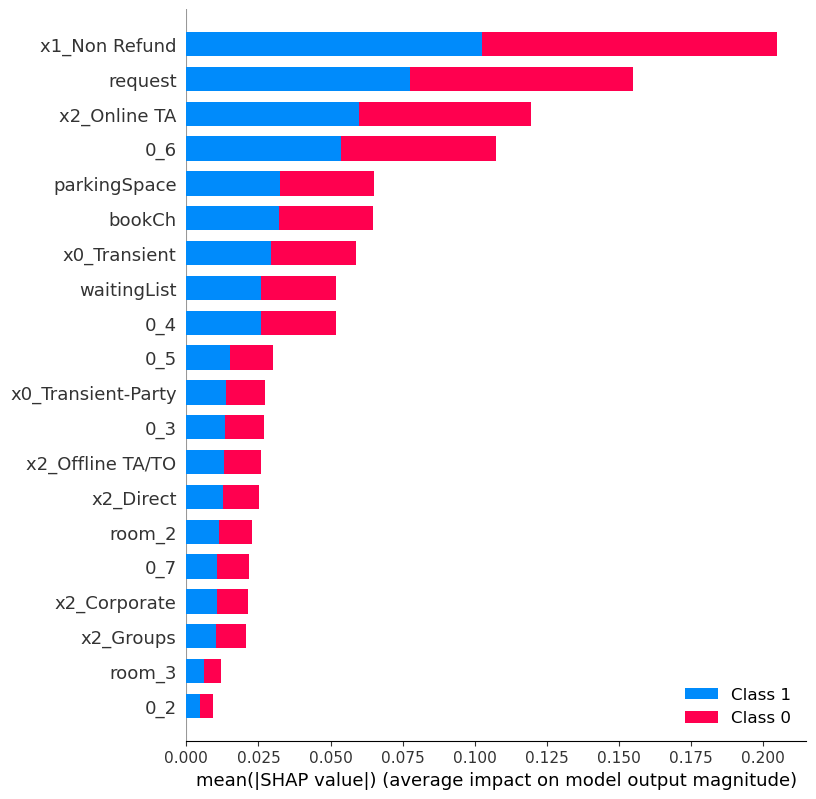

In [ ]:
shap.summary_plot(shap_values, X_test_preprep_m, plot_type="bar")

Selain menggunakan feature importance bawaan dari random forest. Saya juga menggunakan SHAP. SHAP atau Shapley Additive Explanation merupakan salah satu cara untuk menjelaskan bagaimana machine learning yang dipergunakan bekerja. Pada kali ini saya menggunakannya dalam bentuk barplot. Hasil dari kedua proses tersebut menunjukan beberapa fitur yang paling signifikan diantaranya adalah :
Deposit, Market , Request, Customer dan parking space.

Documentasi shap ada disini :
[SHAP documentation](https://shap.readthedocs.io/en/latest/index.html)

In [ ]:
df.head()

,country,market,prevCanc,bookCh,deposit,waitingList,customer,room,parkingSpace,request,cancel
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [ ]:
X_train_selected = X_train[['country','market','bookCh','deposit','customer','parkingSpace']]
X_test_selected = X_test[['country','market','bookCh','deposit','customer','parkingSpace']]

Sayangnya, penerapan binning dan pengurangan feature tidak membantu meningkatnya performa dalam permodelan yang saya lakukan sebelumnya. Hasil permodelan tersebut tidak saya sematkan pada notebook ini secara komprehensif, namun bisa dilihat salah satu contohnya pada bagian komprehensif test pada test set. Meskipun begitu pada permodelan random forest saya melakukan tuning terhadap feature yang digunakan dalam splitting. Maka dari itu proses kedepan saya akan tetap menggunakan fitur seperti yang ada di awal.

# Pemilihan Model

In [ ]:
#Models
tree = DecisionTreeClassifier(random_state=1945)
ada = AdaBoostClassifier(tree, random_state=1945)
logreg = LogisticRegression(solver= 'liblinear',random_state=1945)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state= 1945)
xgb = XGBClassifier(random_state=1945, verbosity=0) 

Berikut adalah beberapa kandidat model yang akan digunakan. Beberapa diantaranya adalah base model seperti tree, logistic dan knn. Ensembel model bagging dengan random forest dan Ensembel model boosting yaitu ada boost dan XGboost. Semua random state dinyatakan sama.

## K-fold Benchmarking

Dalam menyeleksi model yang akan digunakan, saya mengguanakan metode cross validation. kita akan melihat seberapa baik kandidat model dalam melihat unseen data

### K-Fold dengan forloop untuk roc_auc

In [ ]:
models = [logreg,knn,tree,rfc,xgb,ada]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaling',robust_scaler),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdBoost'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

,mean roc_auc,sdev
model,,
XGBoost,0.894028,0.001396
Random Forest,0.888638,0.001203
AdBoost,0.882338,0.003014
Decision Tree,0.877918,0.002405
Logistic Regression,0.849345,0.002808
KNN,0.848168,0.003270


Dapat dilihat bahwa model yang melakukan pekerjaan lebih baik adah XGBoost dan disusul oleh Random Forest serta Ada Boost. Semua model yang digunakan menggunakan default hyperparameter. Penilaian ROC AUC yang saya pakai disini adalah untuk melihat seberapa baik model berkerja melalui perhitungan area under the ROC curve. Angka yang didapatkan tidak mendekati 0.5. Dengan ini kita bisa melihat jauh dari kata random guessing.

### K-Fold dengan forloop untuk accuracy

In [ ]:
models = [logreg,knn,tree,rfc,xgb,ada]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('scaling',robust_scaler),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='accuracy')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdBoost'],'mean_acc':rata,'sdev':std}).set_index('model').sort_values(by='mean_acc',ascending=False)

In [ ]:
Berdasarkan hasil tersebut tetap dalam pengukuan akurasi, XGBoost merupakan model terbaik, disusul oleh random forest. Meskipun begitu, XG Boost
memiliki standar deviasi yang lebih tinggi. Random forest tetap mendapatkan nilai yang terbaik.

## Benchmarking Model dengan Test Set

### Komprehensif Test

In [ ]:
rfc_pipeline = Pipeline([
    ('preprocess', transformer_pure),
    ('scaler', robust_scaler),
    ('model',rfc)
])

In [ ]:
##Random forest Test Set
rfc_pipeline.fit(X_train_selected,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
print('RANDOM FOREST TEST SET')
y_pred=rfc_pipeline.predict(X_test_selected)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

RANDOM FOREST TEST SET
[[9161 1398]
 [2347 3809]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     10559
           1       0.73      0.62      0.67      6156

    accuracy                           0.78     16715
   macro avg       0.76      0.74      0.75     16715
weighted avg       0.77      0.78      0.77     16715



0.7759497457373616

Setelah dilihat ternyata nilai dari fitur yang sudah direduksi tidak menambah performa model

In [ ]:
rfc_pipeline2 = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust_scaler),
    ('model',rfc)
])

In [ ]:
##Random forest Test Set
rfc_pipeline2.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
print('RANDOM FOREST TEST SET')
y_pred=rfc_pipeline.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

RANDOM FOREST TEST SET
[[9312 1247]
 [1941 4215]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     10559
           1       0.77      0.68      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.78      0.79     16715
weighted avg       0.81      0.81      0.81     16715



0.8092731079868382

In [ ]:
ada_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust_scaler),
    ('model',ada)
])

In [ ]:
ada_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
print('AdBoost Model')
y_pred=ada_pipeline.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

AdBoost Model
[[9268 1291]
 [1930 4226]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     10559
           1       0.77      0.69      0.72      6156

    accuracy                           0.81     16715
   macro avg       0.80      0.78      0.79     16715
weighted avg       0.80      0.81      0.80     16715



0.8072988333831888

In [ ]:
xgb_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust_scaler),
    ('model',xgb)
])

In [ ]:
xgb_pipeline.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
print('XGB TEST SET')
y_pred=xgb_pipeline.predict(X_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

XGB TEST SET
[[9374 1185]
 [1932 4224]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     10559
           1       0.78      0.69      0.73      6156

    accuracy                           0.81     16715
   macro avg       0.81      0.79      0.79     16715
weighted avg       0.81      0.81      0.81     16715



0.8135207897098414

Berdasarkan hasil yang dilakukan dengan melibatkan test set, dua model yang terbaik adalah XGBoost dan Random Forest. Kedua model tersebut diambil atas pertimbangan skor akurasi, f1 dan recall. Keduanya adalah kandidat terbaik yang akan dipakai.

### ROC Curve

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


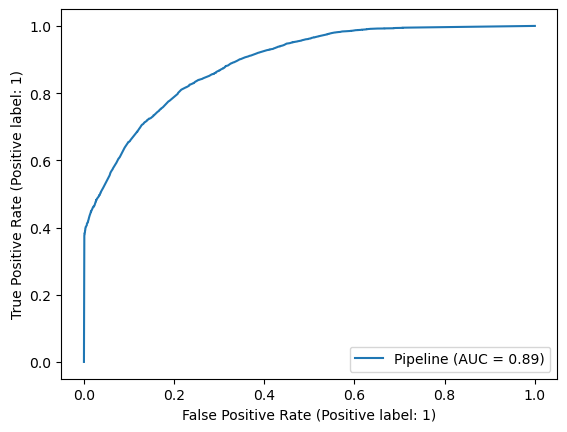

In [ ]:
plot_roc_curve(rfc_pipeline2, X_test, y_test)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


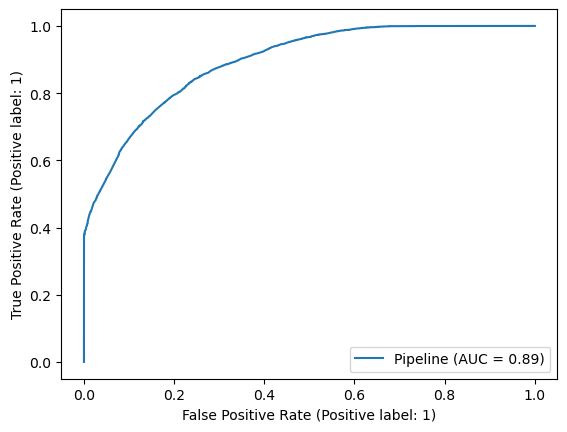

In [ ]:
plot_roc_curve(xgb_pipeline, X_test, y_test)

Dapat dilihat berdasarkan kurva roc. Didapatkan nilai AUC 0.89. Ini jauh dari 0.5 yang mengindikasikan model baik dalam melakukan klasifikasi.(tidak random sehingga mendapatkan hasil 50:50)

# Imbalance Class handling

Seperti yang diketahui bahwa data yang kita miliki tidak seimbang dalam hal distribusi kejadian 0 dan 1 nya. Meskiput belum sampai tahap extreme imbalance, untuk model lebih dapat mendeteksi perbedaan peristiwa secara lebih baik lagi, perlu dilakukan penyerataan distribusi. Diantara cara dalam menghandle imbalance class, ada undersampling dan oversamping. Singkatnya dalam undersampling kita mereduksi data sedemikian rupa hingga proporsinya seimbang, sedangkan oversampling sebaliknya.

## Undersampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [ ]:
y_train.value_counts()

0    42236
1    24622
Name: cancel, dtype: int64

In [ ]:
r_Us = RandomUnderSampler(random_state=1945)

In [ ]:
model = Pipeline([
        ('transform', transformer),
        ('scaling', robust_scaler),
        ('balancing', r_Us),
        ('model', xgb)
    ])


skf = StratifiedKFold(n_splits=5)

# cross val
model_cv = cross_val_score(
    model, 
    X_train, 
    y_train, 
    scoring='f1',
    cv=skf
    )

print(model_cv)
print(model_cv.mean())

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[0.74525589 0.7453322  0.74319394 0.74121703 0.73961692]
0.7429231958021806


In [ ]:
model = Pipeline([
        ('transform', transformer),
        ('scaling', robust_scaler),
        ('balancing', r_Us),
        ('model', rfc)
    ])


skf = StratifiedKFold(n_splits=5)

# cross val
model_cv = cross_val_score(
    model, 
    X_train, 
    y_train, 
    scoring='f1',
    cv=skf
    )

print(model_cv)
print(model_cv.mean())

[0.74232784 0.74091333 0.7386902  0.73651146 0.73401605]
0.7384917760636011


## Oversampling

In [ ]:
smote = SMOTE(random_state=1945)

In [ ]:
model = Pipeline([
        ('transform', transformer),
        ('scaling', robust_scaler),
        ('balancing', smote),
        ('model', xgb)
    ])


skf = StratifiedKFold(n_splits=5)

# cross val
model_cv = cross_val_score(
    model, 
    X_train, 
    y_train, 
    scoring='f1',
    cv=skf
    )

print(model_cv)
print(model_cv.mean())

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
The use of label encoder in XGBClassifier is deprecated and w

[0.74678278 0.74040675 0.74411541 0.74291133 0.73894897]
0.7426330485723585


In [ ]:
model = Pipeline([
        ('transform', transformer),
        ('scaling', robust_scaler),
        ('balancing', smote),
        ('model', rfc)
    ])


skf = StratifiedKFold(n_splits=5)

# cross val
model_cv = cross_val_score(
    model, 
    X_train, 
    y_train, 
    scoring='f1',
    cv=skf
    )

print(model_cv)
print(model_cv.mean())

[0.74426075 0.7424686  0.74391829 0.73784787 0.73572302]
0.7408437051440506


Kali ini saya menggunakan metric 'f1'. Kenapa menggunakan f1? karena f1 adalah rataan dari presisi dan recall dimana keduanya ditujukan untuk seimbang. Hal ini menurut saya penting karena pada tahap ini kita memanipulasi data dengan menambah/mengurangi data dati kondisi naturalnya. Seteleh melihat skor dari 'f1', ternyata perbedaan tidak terlalu mencolok. Namun kali ini, yang akan dipakai adalah Oversampling dengan metode SMOTE.

# Hyperparameter tuning

Untuk mendaatkan kinerja yang paling optimal dari model yang dipilih, saya melakukan hyperparameter tuning. Tuning dilakukan dengan metode cross validasi dengan konsep yang relatif sama sperti sebelumnya namun perbedaanya adalah disini ditujukan untuk memilih hyperparameter.

## Tuning + Imbalanced Handling

### XGBoost tuning process

Xg boost adalah bagian dari ansemble model yang memainkan weight pada data poin yang klasifikasinya salah. lalu, ia akan lakukan hal tersebut secara iteratif(berulang kali) hingga suatu titik. Prediksi akhir yang diperoleh dengan cara menggabungkan hasil prediksi dari tree yang sudah beberapa kali dibuat. Tree yang dibuat bersifat sekuensial atau saling berhubungan.
Hal yang diperlukan dalam optimalisasi xgboost adalah B number of iteration, L shrinkage/ learning rate dan hyper parameter dari tree yang dibuat.
Kalau terlalu Besar, maka akan cenderung overfitting. B tergantung pada learning rate.
learning rate itu mengatur seberapa besar perubahan bobot untuk setiap iterasi.
Semakin besar learning rate, semakin besar perubahan bobot yang terjadi
Nilai learning rate yang lebih kecil memerlukan nilai B yang leibh besar untuk mencapai performa yang optimal.
jika learnin grate telalu kecil maka akan terlalu lama. kalau besar malah kurang optimal. Saya akan mencoba memilih kombinasi terbaik dengan menggunakan Randomized Search.


note : Hyperparameter Basenya pake default.

In [ ]:
skf = StratifiedKFold(n_splits = 5)

# kedalaman pohon
max_depth = list(np.arange(1,11))

# learning rate
learning_rate = list(np.arange(1,100)/100)

# jumlah pohon
n_estimators = list(np.arange(100,201))

# jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2,10)/10)

# gamma (min_impurity_decrease)
gamma = list(np.arange(1,11))

# jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1,10)/10)

# alpha (regularization)
reg_alpha = list(np.logspace(-3,1,10))


# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'model__max_depth':max_depth, 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
#Menggunakan teknik oversampling

from sklearn.model_selection import RandomizedSearchCV

# Benchmark model 2
xgbc = XGBClassifier(random_state=1945, verbosity=0)

# Create the algorithm chains
estimator_xgbc = Pipeline([
        ('tansformer', transformer),
        ('scaling', robust_scaler),
        ('balancing',smote),
        ('model', xgbc)
        ])

# Hyperparameter tuning
random_xgbc_smo = RandomizedSearchCV(
    estimator_xgbc, 
    param_distributions = hyperparam_space_xgbc, 
    cv = skf, 
    scoring = 'recall', 
    n_jobs = -1,  
    random_state=1945 #n_iter default = 10
)

In [ ]:
random_xgbc_smo.fit(X_train, y_train)

/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from p

/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-p

/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yudhapratama/opt/anaconda3/lib/python3.9/site-p

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['customer',
                                                                                'deposit',
                                                                                'market']),
                                                                              ('binary '
                                

In [ ]:

print(random_xgbc_smo.best_score_)

print(random_xgbc_smo.best_params_)

print(random_xgbc_smo.best_estimator_)

0.7944523498290771
{'model__subsample': 0.4, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 150, 'model__max_depth': 10, 'model__learning_rate': 0.56, 'model__gamma': 3, 'model__colsample_bytree': 0.6}
Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                     

In [ ]:
best_model_smo = random_xgbc_smo.best_estimator_

best_model_smo.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
y_pred_best_smo = best_model_smo.predict(X_test)

In [ ]:
#Coba liat skor pada test set

recall_xgbctuned_smo = recall_score(y_test, y_pred_best_smo)
acc_xgbctuned_smo = accuracy_score(y_test, y_pred_best_smo)

In [ ]:
listskor = [acc_xgbctuned_smo, recall_xgbctuned_smo]
Naon = ['Acc smo', 'recall smo']

scoreaftertuning_xgbc_smo = pd.DataFrame({'A': Naon, 'listskor': listskor})
scoreaftertuning_xgbc_smo

,A,listskor
0,Acc smo,0.793658
1,recall smo,0.796784


Hyperparameter terbaik untuk XG_Boost kali ini dicari melalui Randomized Search. Dengan menerapkan hyperparameter hasil pencarian tersebut terlihat peningkatan nilai recall yang juga tajam yaitu menjadi 79.

## Random forest tuning process

RF merupakan bagian ensemble method yang basisnya tree dengan modifikasi dari metode bagging(Bootstrap aggregating. Metode ini pada dasarnya cocok untuk imbalance classification karena metode bootstraping yang dilakukannya. Cara kerjanya adalah random forest melakukan splitting dengan memilih beberapa fitur secara acak dengan kriteria defaultnya gini, lalu diambil salah satu dari fitur tersebut selanjutnya digunakan sebagai splitter lalu hal yang sama dilakukan berulang kali. Karena basicnya adalah tree, untuk mengoptimalkan random forest, ada 3 yaitu berapa banyak tree, berapa banyak fitur yang diambil secara acak dan hyperparameter dari setiap pohon. 

Perbedaan dengan model sebelumnya adalah sebenarnya Random forest sama-sama menggunakan tree, tapi  yang ini, setiap pohon independen. sedangkan pada boosting, pohon saling berhubungan karena sifatnya yang sekuensial.

### Random Forest Tuning process

In [ ]:
# Random forest

# Number of trees in random forest
n_estimators = list(np.arange(100, 2000, 1))

# Number of features to consider at every split
max_features = list(np.arange(2, 9, 1))

# Maximum number of levels in tree
max_depth = list(np.arange(20, 101, 1))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(2, 21, 1))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(1, 21, 1))


hyperparam_space_rfc = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
}


In [ ]:
# Random Forest + Smote
estimator_rfc = Pipeline([
        ('tansformer', transformer),
        ('scaling', robust_scaler),
        ('balancing',smote),
        ('model', rfc)
        ])

# Hyperparameter tuning
random_rfc_smo = RandomizedSearchCV(
    estimator_rfc, 
    param_distributions = hyperparam_space_rfc, 
    cv = skf, 
    scoring = 'recall', 
    n_jobs = -1,  
    random_state=1945, 
    n_iter = 25
)

In [ ]:
random_rfc_smo.fit(X_train, y_train)

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot '
                                                                               'encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['customer',
                                                                                'deposit',
                                                                                'market']),
                                                                              ('binary '
                                

In [ ]:
best_model_rfc_smo = random_rfc_smo.best_estimator_

best_model_rfc_smo.fit(X_train, y_train)

Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
y_pred_best_rfc_smo = best_model_rfc_smo.predict(X_test)

In [ ]:
#Coba liat skor pada test set

recall_rfctuned_smo = recall_score(y_test, y_pred_best_rfc_smo)
acc_rfctuned_smo = accuracy_score(y_test, y_pred_best_rfc_smo)

In [ ]:
listskor = [acc_rfctuned_smo, recall_rfctuned_smo]
Naon = ['Acc smo', 'recall smo']

scoreaftertuning_rfc_smo = pd.DataFrame({'A': Naon, 'listskor': listskor})
scoreaftertuning_rfc_smo

,A,listskor
0,Acc smo,0.797009
1,recall smo,0.796459


In [ ]:
print(classification_report(y_test, y_pred_best_rfc_smo))

Hyperparameter terbaik untuk Random Forest Classifier melalui Randomized Search adalah ; max_depth = 58, max_features = 5 dan min_sample_split = 10. Dengan menerapkan hyperparameter tersebut terlihat peningkatan nilai recall yang juga tajam yaitu menjadi 79.

Proses yang dilakukan pada kedua model sebenarnya tidak perlu dilakukan. Akan lebih baik untuk memilih model dari awal sebelum melakukan hyperparameter tuning untuk menyingkat waktu yang diperlukan. Saya mengerti bahwa efektifitas merupakan hal yang sangat diperlukan. Namun karena waktu yang diberikan mencukupi, saya ingin tahu seperti apa kedua model tersebut setelah dilakukan tuning. Bila dilihat hasilnya, kedua model sebenarnya memiliki performa yang tidak jauh berbeda. Saya akan memilih model random forest untuk disimpan sebagai final model.

## Saving The Model

In [ ]:
import pickle

In [ ]:
random_rfc_smo.best_estimator_

Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
#Menyimpan model
filename = 'Model_rfc2.sav'
pickle.dump(random_rfc_smo.best_estimator_, open(filename, 'wb'))

In [ ]:
# ###load model
# loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
# loaded_model

Pipeline(steps=[('tansformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['customer', 'deposit',
                                                   'market']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Other',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                               

In [ ]:
# df.head()

,country,market,prevCanc,bookCh,deposit,waitingList,customer,room,parkingSpace,request,cancel
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [ ]:
# df_nolabel = df.copy()
# df_nolabel.drop(columns= 'cancel', inplace = True)
# df_nolabel

,country,market,prevCanc,bookCh,deposit,waitingList,customer,room,parkingSpace,request
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2
...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0


In [ ]:
# loaded_model.predict(df_nolabel)

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
# df_predict = pd.DataFrame({
#     'country' : ['IRL'],
#     'market'  : ['Offline TA/TO'],
#     'prevCanc': [0],
#     'bookCh' : [0],
#     'deposit' : ['No Deposit'],
#     'waitingList' : [0],
#     'customer' : ['Transient-Party'],
#     'room' : ['A'],
#     'parkingSpace' : [0],
#     'request' : [0]
# })

In [ ]:
# loaded_model.predict(df_predict)

array([0])

# Kesimpulan

Berdasarkan nilai report yang dimiliki oleh Final Model, dapat disimpulkan bahwa dengan menggunakan model tersebut dalam memprediksi calon tamu dapat mengurangi hampir 80% pengunjung yang tidak jadi menginap. 

Setiap kali model ini memprediksi calon pengunjung yang tidak jadi menginap, ketepatan prediksinya sebesar 76%. Dengan hyperparameter tuning pada model, completeness dari prediksi bertambah 8% dari 68-78 persen.

Jika diasumsikan revenue dari sebuah kamar adalah Rp.408.000,(menggunakan data Average Room Rate Bintang 3 di Jakarta tahun 2020)  [Sumber bisa klik disini](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwigxe7tgbD7AhVhSGwGHevrBzkQFnoECDYQAQ&url=https%3A%2F%2Fcw-gbl-gws-prod.azureedge.net%2F-%2Fmedia%2Fcw%2Fmarketbeat-pdfs%2F2020%2Fq2%2Fapac-and-gc-q2-2020%2Findonesia--jakarta--hotel-q2-2020.pdf%3Frev%3Dafcbd779be3540fd9e468b24aec593a3&usg=AOvVaw1ESKiukcb7XP_xDifSXR7E) . Jumlah kamar yang tersedia adalah 100. Serta dengan skenario kamar yang kosong karena cancellation tidak terisi lagi. Maka,


Tanpa Model = 

Expected Revenue : 200 X 408.000 = 81.600.000

Total kamar terisi : 100 (Asumsikan peristiwa cancel 50%)


Total kamar kosong : 100 

Revenue loss : 40.800.000


------------------------------------------------------------
Dengan Model, fokus pada memprediksi kejadian cancel :

Revenue loss yang diselamatkan : 80 X (408.000) = 32.640.000

Revenue loss yang tidak diselamatkan :20 X (408.000) = 8.160.000

Maka dari itu, melalui model kita dapat lebih melihat ekspektasi revenue secara lebih realistis dan menyelamatkan revenue loss akibat kamar kosong yang tidak ada pembayaran penuh. Meskipun begitu, masih ada kekurangan yaitu pada kesalahan prediksi tindakan.



# Rekomendasi

Beberapa rekomendasi yang dapat dilakukan oleh perusahaan dan penelitian selanjutnya dalam adalah :




*   Tindakan preventif booking Cancellation

1.   Cancellation Policy

    Berdasarkan hasil analisa feature importance, hal yang paling signifikan yang mempengaruhi cancellation adalah deposit. Pengusaha hotel disarankan untuk mematangkan cancellation policy mereka. Libatkan juga Online Travel Agency untuk menyesuaikan dengan kebijakan mereka agar tercipta doable policy. Tidak dapat diragukan lagi bahwa deposit membuat calon tamu berfikir ulang dalam melakukan cancel.
2.   Refocusing untuk segmen tertentu

    Fokuskan effort marketing dan beri keuntungan bagi user yang jadi menginap atau melakukan pembayaran penuh. Selain itu, promo bisa dikategorikan sesuai dengan kemungkinan user tersebut cancel/tidak. Dengan begitu, perusahaan bisa memfokuskan pelayanannya bagi user yang potensial dan tidak merugi karena memberikan promo pada user yang salah.
3. Send Reminders

    Bila dimungkinkan, beri reminder pada calon tamu sebelum waktu check-in berlangsung. Selain mengingatkan, bisa diselingi dengan edukasi mengenai cancellation policy seperti pada poin 1.
4. Dynamic Pricing

    Dengan berbekal data yang ada, dynamic pricing bisa menjadi pilihan. Dimana harga yang ditawarkan kepada konsumen beragam dari user ke user berdasarkan ketersediaan kamar dan catatan historis pengguna. Sebagai contoh, kamar yang kosong karena booking cancellation ditawarkan dengan harga yang lebih murah.
5. Humanis/Tidak Mekanistik

    Calon tamu yang ada sekarang bisa jadi merupakan tamu di masa depan. Maka dari itu, meskipun menggunakan machine learning, akan lebih baik jika tetap dilakukan pendekatan yang empatik. Meningkatkan trust pada tamu agar dapat booking kembali dimasa depan merupakan sebuah keuntungan. 


*   Penelitian Selanjutnya


1.   Menambahkan fitur yang dapat lebih menjelaskan konteks atas suatu kejadian tertentu. Contohnya, keterangan waktu atau alasan yang bersangkutan cancel (bila dimungkinkan). Dengan itu, diyakini insight yang didapatkan lebih baik lagi. Better insight, better you curate action/strategy. Bisa jadi kejadian booking didasari oleh unforeseen event yang terjadi pada waktu tertentu di tempat tertentu.
2.   Memperdalam penyebab kesalahan prediksi yang terjadi agar memperbaiki performa model yang akan digunakan kedepan.
3. Mencoba teknik preprocessing yang lebih advance, metode yang berbeda dalam mengangani imbalaced data dan model ML yang baru.








# Referensi

https://www.sciencedirect.com/science/article/pii/S2352340918315191

https://www.redalyc.org/pdf/3887/388751309003.pdf

https://www.iunera.com/kraken/interviews/what-you-need-to-know-about-hotel-booking-cancellations-big-data/

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble


https://business.vic.gov.au/business-information/tourism-industry-resources/tourism-crisis-management-guide/plan/booking-cancellations#your-cancellation-policy

https://www.belizebank.com/wp-content/uploads/2019/03/Prevent-and-Handle-No-Shows-A-guide-for-Hotel-Owners-and-Managers.pdf

https://jtsiskom.undip.ac.id/index.php/jtsiskom/article/viewFile/13790/12654

https://www.ezeeabsolute.com/blog/reduce-last-minute-no-shows-booking-cancellations/